# **Clustering berdasarkan Price dan Review**

**Ahmad Habib Fitriansyah || 1301174056 || IF-41-12 || Air Bnb**

# Formula Permasalahan

Pada tabel air bnb terdapat kolom **price dan review**. Untuk melalukan clustering dengan metode yang digunakan adalah **K-Means**

# Eksplorasi dan Persiapan Data

Hal yang dilakukan adalah misahkan setiap kolom **price dan review** dan dimasukan ke dalam list yang berbeda. Hal ini dilakukan untuk mempermudah melakukan persiapan data.

Selain itu, ada beberapa hal lagi yang dilakukan antara lain :


1.   Menghapus data kosong
2.   Menghapus data yang terdeteksi sebagai outlier

# Pemodelan

Dataset yang digunakan adalah Air_bnb.csv, dataset tersebut saya panggil dari Google Drive

# **IMPORT**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import csv
import math
import random 
import statistics
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split

# Ahmad Habib Fitriansyah
# Metro, Indonesia
# Tuesday, 31 March 2020, 23:01 PM

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Read dataset and Cleaning**

In [0]:
def readDataset():

  price = []
  review = []
  a = [] # PRICE
  b = [] # REVIEW

  with open('/content/drive/My Drive/Machine Learning/air_bnb.csv', mode='r') as csv_input:
        data = csv.reader(csv_input)
        next(data)
        for row in data:
            a.append(row[9])
            b.append(row[13])

  # Memasukan tabel price ke list bertujuan untuk memisahkan antar kolom yg ingin diambil
  for i in range(len(a)):
    price.append(int(a[i]))

  # Memasukan tabel reviewke list bertujuan untuk memisahkan antar kolom yg ingin diambil
  for j in range(len(b)):
    review.append(b[j])

  return price, review

**Scaling : Using Min-Max Normalization to 0-1**

In [0]:
def scalingData(data):

  minValue = 9999999
  maxValue = 0
  newData = []

    # Find Max Value
  for i in range(len(data)):
    if maxValue < data[i]:
      maxValue = data[i]
    
    # Find Min Value
  for j in range(len(data)):
    if minValue > data[j]:
      minValue = data[j]

    # Min-Max Normalization
  for k in range(len(data)):
    temp = (data[k] - minValue) / (maxValue - minValue)
    newData.append(temp)

  return newData


**Counting Distance to Centroid**

In [0]:
# Menghitung Jarak ke Cetroid
def distance(price, review, centroidPrice, centroidReview, jumCentroid):
  dist = []
  for i in range(jumCentroid):
    tempArr = []
    for j in range(len(price)):
      temp = math.sqrt(((centroidPrice[i] - price[j])**2) + ((centroidReview[i] - review[j])**2))
      tempArr.append(temp)
    dist.append(tempArr)
  
  
  return dist

# **K = 6**

**Random Centroid k = 6**

In [0]:
# Melakukian Grouping setiap centroid. Maksudnya memasukan data MemberC1 atau C2 sesuai dengan jarak centroid terdekat
def centroid(data):

  centroid = []
  jumCentroid = 6
  i = 0
  while (i < jumCentroid):
    temp = random.choice(data)
    if len(centroid) == 0:
      centroid.append(temp)
    else:
      count = 0
      while True:
        j = 0
        temp = random.choice(data)
        if temp != centroid[j]:
          break
        j = j + 1
      centroid.append(temp)

      # for k in range(len(centroid)):
      #   if temp == centroid[k]:
      #     count = count + 1
      #   if count != 0:
      #     # centroid.append(temp)
      #     temp = random.choice(data)
      # if count == 0:
      #   centroid.append(temp)
    i = i + 1

  
  return centroid, jumCentroid

**Grouping Every Centroid k = 6**

In [0]:
# Random Cetroid ini digunakan untuk menentukan Cetroid
def grouping(distanceCentroid, priceTrain, reviewTrain, jumCentroidPrice):
  memberC1 = []
  memberC2 = []
  memberC3 = []
  memberC4 = []
  memberC5 = []
  memberC6 = []
  priceC1 = []
  priceC2 = []
  priceC3 = []
  priceC4 = []
  priceC5 = []
  priceC6 = []
  reviewC1 = []
  reviewC2 = []
  reviewC3 = []
  reviewC4 = []
  reviewC5 = []
  reviewC6 = []

  for k in range(len(distanceCentroid[0])):
    temp = []
    for m in range(jumCentroidPrice):
      temp.append(distanceCentroid[m][k])
      minValue = min(temp)
      temp2 = 0
      tempIter = 0
      for n in range(len(temp)):
        if minValue == temp[n]:
          tempIter = n
      
    if tempIter == 0:
      priceC1.append(priceTrain[k])
      reviewC1.append(reviewTrain[k])
    elif tempIter == 1:
      priceC2.append(priceTrain[k])
      reviewC2.append(reviewTrain[k])
    elif tempIter == 2:
      priceC3.append(priceTrain[k])
      reviewC3.append(reviewTrain[k])
    elif tempIter == 3:
      priceC4.append(priceTrain[k])
      reviewC4.append(reviewTrain[k])
    elif tempIter == 4:
      priceC5.append(priceTrain[k])
      reviewC5.append(reviewTrain[k])
    elif tempIter == 5:
      priceC6.append(priceTrain[k])
      reviewC6.append(reviewTrain[k])
  
  memberC1.append(priceC1)
  memberC1.append(reviewC1)

  memberC2.append(priceC2)
  memberC2.append(reviewC2)

  memberC3.append(priceC3)
  memberC3.append(reviewC3)

  memberC4.append(priceC4)
  memberC4.append(reviewC4)

  memberC5.append(priceC5)
  memberC5.append(reviewC5)

  memberC6.append(priceC6)
  memberC6.append(reviewC6)

  return memberC1, memberC2, memberC3, memberC4, memberC5, memberC6

# **Clustering with k = 6**

K = 6 adalah inisiasi awal dari saya, yang menentukan bahwa jumlah cluster adalah 6

Melakukan proses clustering menggunakan 6 cluster

**Clustering**

Melakukan Clustering / memasukan data ke cluster nya

In [0]:
for j in range(30):
  if j == 0:
    centroidPrice, jumCentroid = centroid(newDataPrice)
    centroidReview, jumCentroidReview = centroid(newDataReview)
    distanceCentroid = distance(newDataPrice, newDataReview, centroidPrice, centroidReview, jumCentroid)
    memberC1, memberC2, memberC3, memberC4, memberC5, memberC6 = grouping(distanceCentroid, newDataPrice, newDataReview, jumCentroid)

  else:
    centroidPrice = []
    centroidReview = []
    for k in range(jumCentroid):
      centroidPrice.append(statistics.mean(memberC1[0]))
      centroidPrice.append(statistics.mean(memberC2[0]))
      centroidPrice.append(statistics.mean(memberC3[0]))
      centroidPrice.append(statistics.mean(memberC4[0]))
      centroidPrice.append(statistics.mean(memberC5[0]))
      centroidPrice.append(statistics.mean(memberC6[0]))

      centroidReview.append(statistics.mean(memberC1[1]))
      centroidReview.append(statistics.mean(memberC2[1]))
      centroidReview.append(statistics.mean(memberC3[1]))
      centroidReview.append(statistics.mean(memberC4[1]))
      centroidReview.append(statistics.mean(memberC5[1]))
      centroidReview.append(statistics.mean(memberC6[1]))

    distanceCentroid = distance(newDataPrice, newDataReview, centroidPrice, centroidReview, jumCentroid)
    memberC1, memberC2, memberC3, memberC4, memberC5, memberC6 = grouping(distanceCentroid, newDataPrice, newDataReview, jumCentroid)

print("Jumlah Anggota C1 :", len(memberC1[0]))
print("Jumlah Anggota C2 :", len(memberC2[0]))
print("Jumlah Anggota C3 :", len(memberC3[0]))
print("Jumlah Anggota C4 :", len(memberC4[0]))
print("Jumlah Anggota C5 :", len(memberC5[0]))
print("Jumlah Anggota C6 :", len(memberC6[0]))

Jumlah Anggota C1 : 1388
Jumlah Anggota C2 : 3727
Jumlah Anggota C3 : 904
Jumlah Anggota C4 : 8491
Jumlah Anggota C5 : 1054
Jumlah Anggota C6 : 2021


**Plot**

Membuat Plot

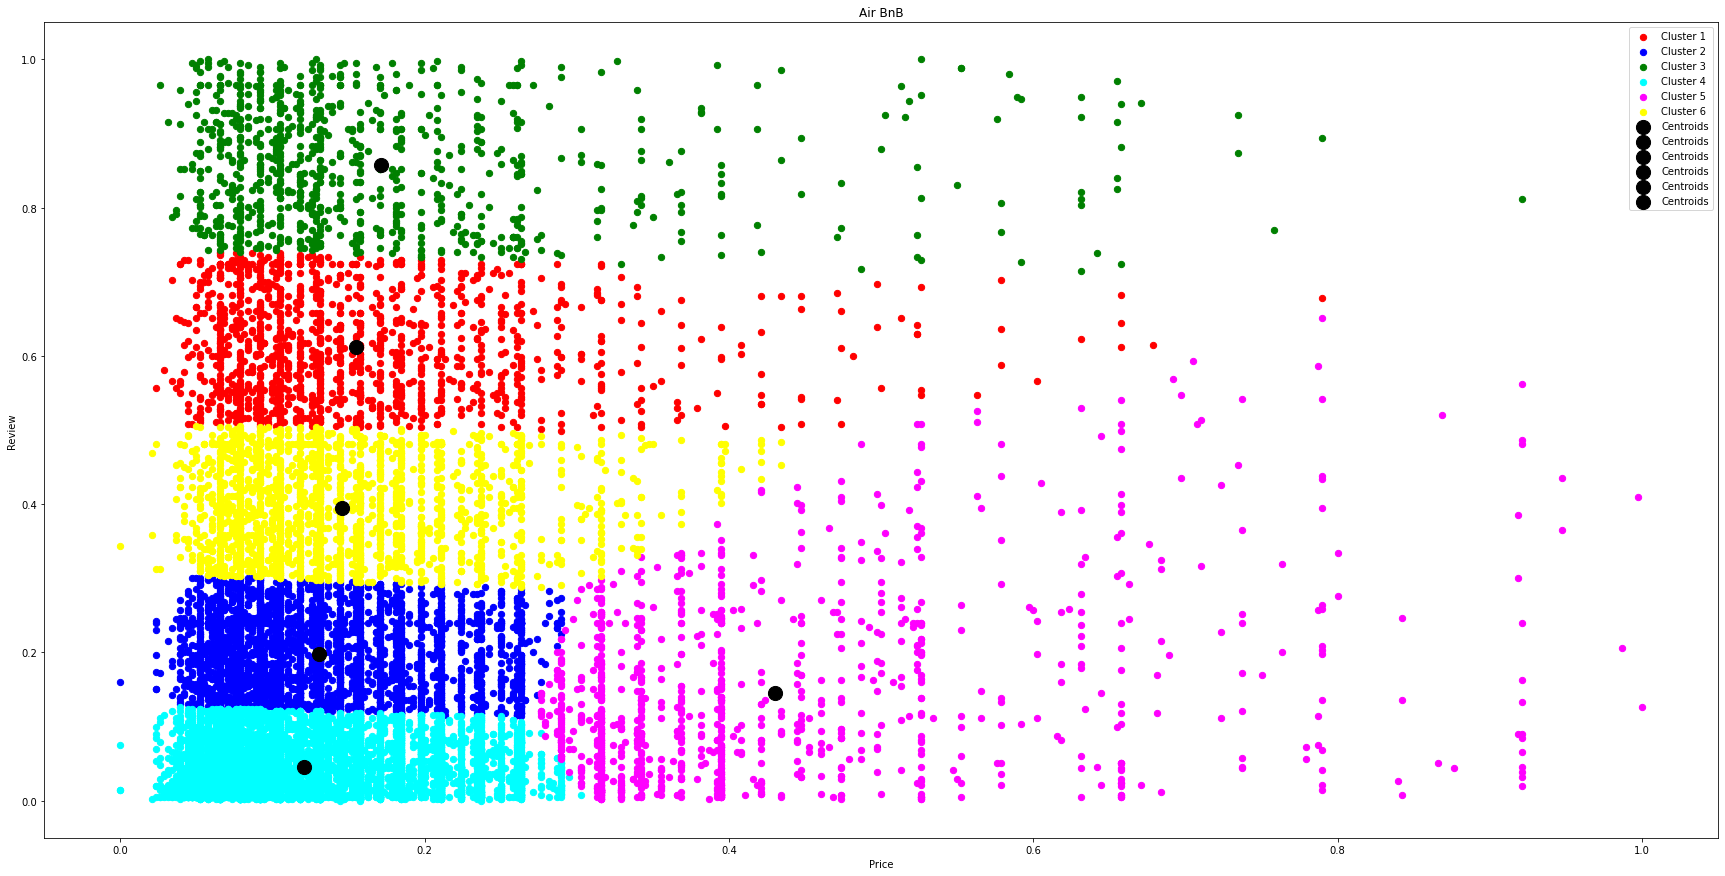

In [0]:
plt.figure(figsize=(30,15))
plt.scatter(memberC1[0], memberC1[1], s = 40, c = 'red', label = 'Cluster 1')
plt.scatter(memberC2[0], memberC2[1], s = 40, c = 'blue', label = 'Cluster 2')
plt.scatter(memberC3[0], memberC3[1], s = 40, c = 'green', label = 'Cluster 3')
plt.scatter(memberC4[0], memberC4[1], s = 40, c = 'cyan', label = 'Cluster 4')
plt.scatter(memberC5[0], memberC5[1], s = 40, c = 'magenta', label = 'Cluster 5')
plt.scatter(memberC6[0], memberC6[1], s = 40, c = 'yellow', label = 'Cluster 6')
plt.scatter(centroidPrice[0], centroidReview[0], s = 200, c = 'black', label = 'Centroids')
plt.scatter(centroidPrice[1], centroidReview[1], s = 200, c = 'black', label = 'Centroids')
plt.scatter(centroidPrice[2], centroidReview[2], s = 200, c = 'black', label = 'Centroids')
plt.scatter(centroidPrice[3], centroidReview[3], s = 200, c = 'black', label = 'Centroids')
plt.scatter(centroidPrice[4], centroidReview[4], s = 200, c = 'black', label = 'Centroids')
plt.scatter(centroidPrice[5], centroidReview[5], s = 200, c = 'black', label = 'Centroids')
plt.title('Air BnB')
plt.xlabel('Price')
plt.ylabel('Review')
plt.legend()
plt.show()

# Evaluasi

**Evaluation with Elbow Method**

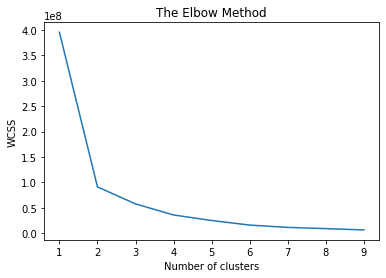


Jumlah Cluster terbaik adalah 2 karena pada plot di atas garis patah pada angka 2


In [0]:
# K-Means Clustering

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('/content/drive/My Drive/Machine Learning/air_bnb.csv')
dataset.dropna(inplace=True)
X = dataset.iloc[:, [9, 13]].values

# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
print()
print("Jumlah Cluster terbaik adalah 2 karena pada plot di atas garis patah pada angka 2")

# **K = 2**

**Read Dataset**

In [0]:
a, b = readDataset()

print("Panjang Data :", len(a), len(b))

**Remove Data empty**

Menghapus data kosong yang terdapat pada kolom Price dan Review

In [0]:
tempPrice = []
tempReview = []

for i in range(len(b)):
  if b[i] != '' and a[i] != '':
    tempReview.append(float(b[i]))
    tempPrice.append(a[i])

print("Panjang Data :", len(tempPrice), len(tempReview))

**Outlier**

Kodingan ini digunakan untuk mendeteksi outlier. Jika sebuah data melebihi outliernya, maka data tersebut dihapus

In [0]:
an_array = np.array(tempPrice)
mean = np.mean(an_array)
standard_deviation = np.std(an_array)
distance_from_mean = abs(an_array - mean)
max_deviations = 2
not_outlier_price = distance_from_mean < max_deviations * standard_deviation

an_arrays = np.array(tempReview)
mean = np.mean(an_arrays)
standard_deviation = np.std(an_arrays)
distance_from_mean = abs(an_arrays - mean)
max_deviations = 2
not_outlier_review = distance_from_mean < max_deviations * standard_deviation
  
no_outliers_review = []
no_outliers_price = []

for nn in range(len(tempReview)):
  if (not_outlier_price[nn] == True) and (not_outlier_review[nn] == True):
    no_outliers_review.append(an_arrays[nn])
    no_outliers_price.append(an_array[nn])
      
print("Panjang Data :", len(no_outliers_review), len(no_outliers_price))

Panjang Data : 17585 17585


**Scaling**

Scaling dilakukan untuk menyamaratakan range dari setiap kolom. Metode yang digunakan adalah **Min-Max Scaler**

In [0]:
newDataPrice = scalingData(no_outliers_price)
newDataReview = scalingData(no_outliers_review)

print(newDataPrice[0])
print(newDataReview[0])

0.15789473684210525
0.9079903147699758


K = 2 adalah hasil dari Evaluasi Elbow yang menunjukan bahwa jumlah cluster terbaik adalah 2

**Grouping Every Centroid k = 2**

In [0]:
# Melakukian Grouping setiap centroid. Maksudnya memasukan data MemberC1 atau C2 sesuai dengan jarak centroid terdekat
def groupingElbow(distanceCentroid, priceTrain, reviewTrain, jumCentroidPrice):
  memberC1 = []
  memberC2 = []
  priceC1 = []
  priceC2 = []
  reviewC1 = []
  reviewC2 = []

  for k in range(len(distanceCentroid[0])):
    temp = []
    for m in range(jumCentroidPrice):
      temp.append(distanceCentroid[m][k])
      minValue = min(temp)
      temp2 = 0
      tempIter = 0
      for n in range(len(temp)):
        if minValue == temp[n]:
          tempIter = n
      
    if tempIter == 0:
      priceC1.append(priceTrain[k])
      reviewC1.append(reviewTrain[k])
    elif tempIter == 1:
      priceC2.append(priceTrain[k])
      reviewC2.append(reviewTrain[k])
  
  memberC1.append(priceC1)
  memberC1.append(reviewC1)

  memberC2.append(priceC2)
  memberC2.append(reviewC2)


  return memberC1, memberC2

**Random Centroid k = 2 (based on best cluster from Elbow)**

In [0]:
# Random Cetroid ini digunakan untuk menentukan Cetroid
def centroidElbow(data):

  centroid = []
  jumCentroid = 2
  i = 0
  while (i < jumCentroid):
    temp = random.choice(data)
    if len(centroid) == 0:
      centroid.append(temp)
    else:
      count = 0
      while True:
        j = 0
        temp = random.choice(data)
        if temp != centroid[j]:
          break
        j = j + 1
      centroid.append(temp)
    i = i + 1

  
  return centroid, jumCentroid

# **Clustering based on best cluster**

**Clustering**

In [0]:
for j in range(30):
  if j == 0:
    centroidPrice, jumCentroid = centroidElbow(newDataPrice) #define centroid
    centroidReview, jumCentroidReview = centroidElbow(newDataReview) #define centroid
    distanceCentroid = distance(newDataPrice, newDataReview, centroidPrice, centroidReview, jumCentroid) #counting distance every centroid
    memberC1, memberC2 = groupingElbow(distanceCentroid, newDataPrice, newDataReview, jumCentroid) #grouping data based closest distance

  else:
    centroidPrice = []
    centroidReview = []
    for k in range(jumCentroid):
      centroidPrice.append(statistics.mean(memberC1[0]))
      centroidPrice.append(statistics.mean(memberC2[0]))

      centroidReview.append(statistics.mean(memberC1[1]))
      centroidReview.append(statistics.mean(memberC2[1]))

    distanceCentroid = distance(newDataPrice, newDataReview, centroidPrice, centroidReview, jumCentroid)
    memberC1, memberC2 = groupingElbow(distanceCentroid, newDataPrice, newDataReview, jumCentroid)

print("Panjang Anggota C1 :", len(memberC1[0]))
print("Panjang Anggota C2 :", len(memberC2[0]))

Panjang Anggota C1 : 3792
Panjang Anggota C2 : 13793


**Plot**

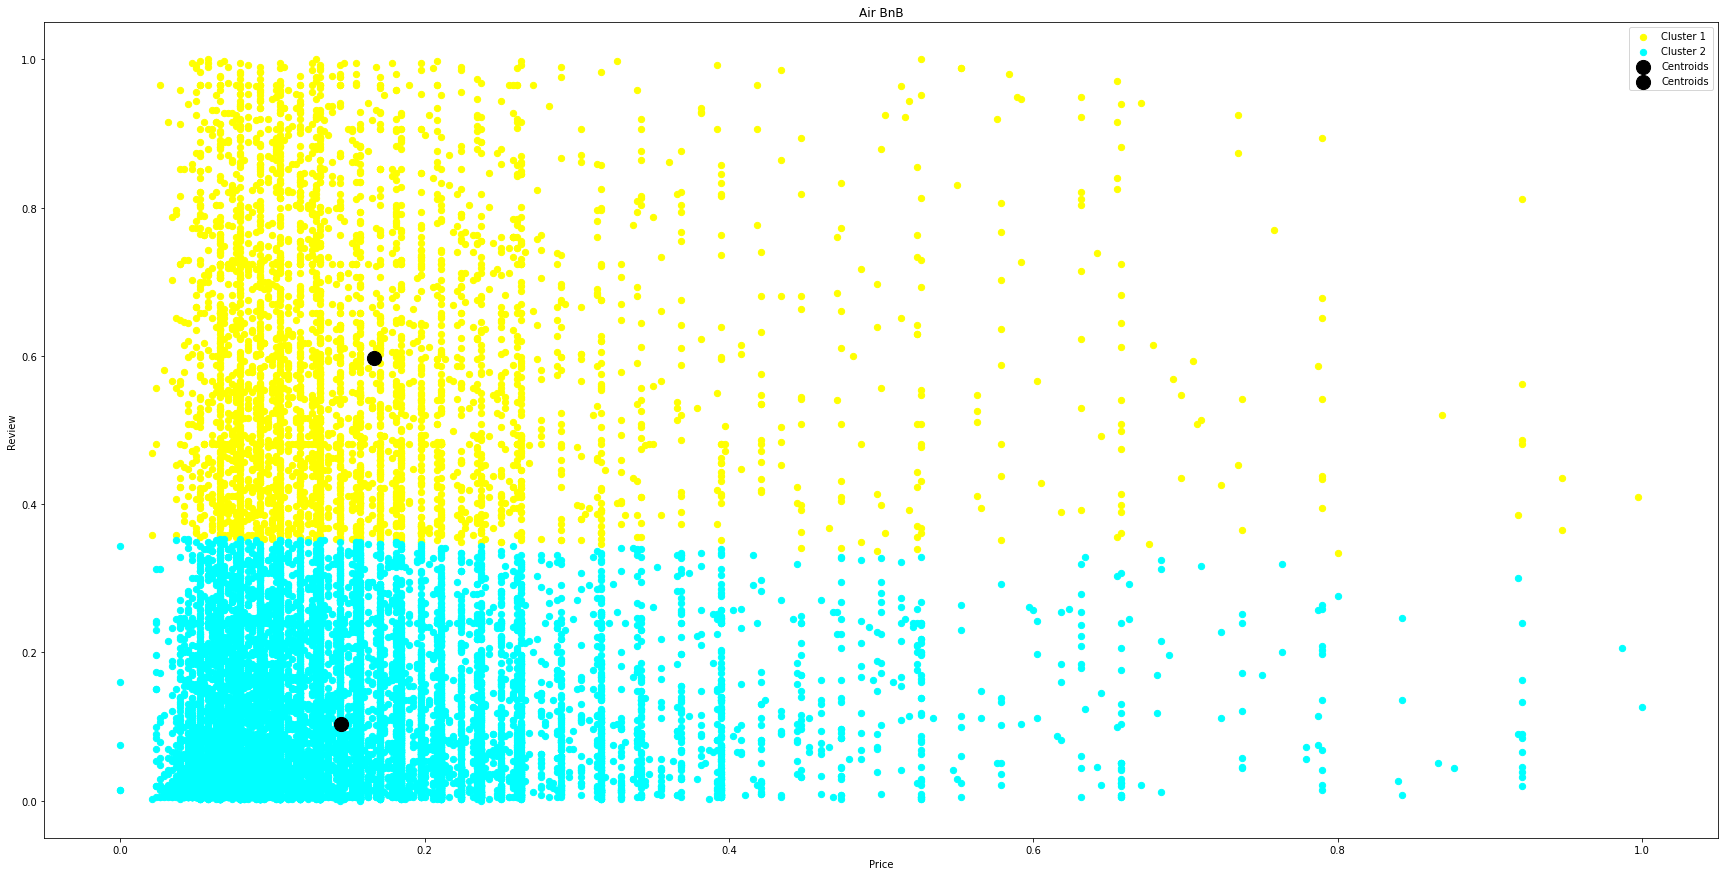

In [0]:
plt.figure(figsize=(30,15))
plt.scatter(memberC1[0], memberC1[1], s = 40, c = 'yellow', label = 'Cluster 1')
plt.scatter(memberC2[0], memberC2[1], s = 40, c = 'cyan', label = 'Cluster 2')
plt.scatter(centroidPrice[0], centroidReview[0], s = 200, c = 'black', label = 'Centroids')
plt.scatter(centroidPrice[1], centroidReview[1], s = 200, c = 'black', label = 'Centroids')
plt.title('Air BnB')
plt.xlabel('Price')
plt.ylabel('Review')
plt.legend()
plt.show()

# Eksperimen

Eksperimen yang dilakuan adalah :

**1. Tidak melakukan Deteksi Outlier**

Read Dataset

In [0]:
a1, b1 = readDataset()

print("Panjang Data :", len(a1), len(b1))

Panjang Data : 22552 22552


Remove Empty Data

In [0]:
tempPrice1 = []
tempReview1 = []

for i in range(len(b1)):
  if b1[i] != '' and a1[i] != '':
    tempReview1.append(float(b1[i]))
    tempPrice1.append(a1[i])

print("Panjang Data :", len(tempPrice1), len(tempReview1))

Panjang Data : 18638 18638


Scaling

In [0]:
newDataPrice1 = scalingData(tempPrice1)
newDataReview1 = scalingData(tempReview1)

print(newDataPrice1[0])
print(newDataReview1[0])

0.006666666666666667
0.102291325695581


Grouping

In [0]:
# Melakukian Grouping setiap centroid. Maksudnya memasukan data MemberC1 atau C2 sesuai dengan jarak centroid terdekat
def groupingElbow(distanceCentroid, priceTrain, reviewTrain, jumCentroidPrice):
  memberC1 = []
  memberC2 = []
  priceC1 = []
  priceC2 = []
  reviewC1 = []
  reviewC2 = []

  for k in range(len(distanceCentroid[0])):
    temp = []
    for m in range(jumCentroidPrice):
      temp.append(distanceCentroid[m][k])
      minValue = min(temp)
      temp2 = 0
      tempIter = 0
      for n in range(len(temp)):
        if minValue == temp[n]:
          tempIter = n
      
    if tempIter == 0:
      priceC1.append(priceTrain[k])
      reviewC1.append(reviewTrain[k])
    elif tempIter == 1:
      priceC2.append(priceTrain[k])
      reviewC2.append(reviewTrain[k])
  
  memberC1.append(priceC1)
  memberC1.append(reviewC1)

  memberC2.append(priceC2)
  memberC2.append(reviewC2)


  return memberC1, memberC2

Random Centroid

In [0]:
# Random Cetroid ini digunakan untuk menentukan Cetroid
def centroidElbow(data):

  centroid = []
  jumCentroid = 2
  i = 0
  while (i < jumCentroid):
    temp = random.choice(data)
    if len(centroid) == 0:
      centroid.append(temp)
    else:
      count = 0
      while True:
        j = 0
        temp = random.choice(data)
        if temp != centroid[j]:
          break
        j = j + 1
      centroid.append(temp)
    i = i + 1

  
  return centroid, jumCentroid

Clustering

In [0]:
for j in range(30):
  if j == 0:
    centroidPrice1, jumCentroid1 = centroidElbow(newDataPrice1) #define centroid
    centroidReview1, jumCentroidReview1 = centroidElbow(newDataReview1) #define centroid
    distanceCentroid1 = distance(newDataPrice1, newDataReview1, centroidPrice1, centroidReview1, jumCentroid1) #counting distance every centroid
    memberC1_1, memberC2_1 = groupingElbow(distanceCentroid1, newDataPrice1, newDataReview1, jumCentroid1) #grouping data based closest distance

  else:
    centroidPrice1 = []
    centroidReview1 = []
    for k in range(jumCentroid1):
      centroidPrice1.append(statistics.mean(memberC1_1[0]))
      centroidPrice1.append(statistics.mean(memberC2_1[0]))

      centroidReview1.append(statistics.mean(memberC1_1[1]))
      centroidReview1.append(statistics.mean(memberC2_1[1]))

    distanceCentroid1 = distance(newDataPrice1, newDataReview1, centroidPrice1, centroidReview1, jumCentroid1)
    memberC1_1, memberC2_1 = groupingElbow(distanceCentroid1, newDataPrice1, newDataReview1, jumCentroid1)

print("Panjang Anggota C1 :", len(memberC1_1[0]))
print("Panjang Anggota C2 :", len(memberC2_1[0]))

Panjang Anggota C1 : 3016
Panjang Anggota C2 : 15622


Plot

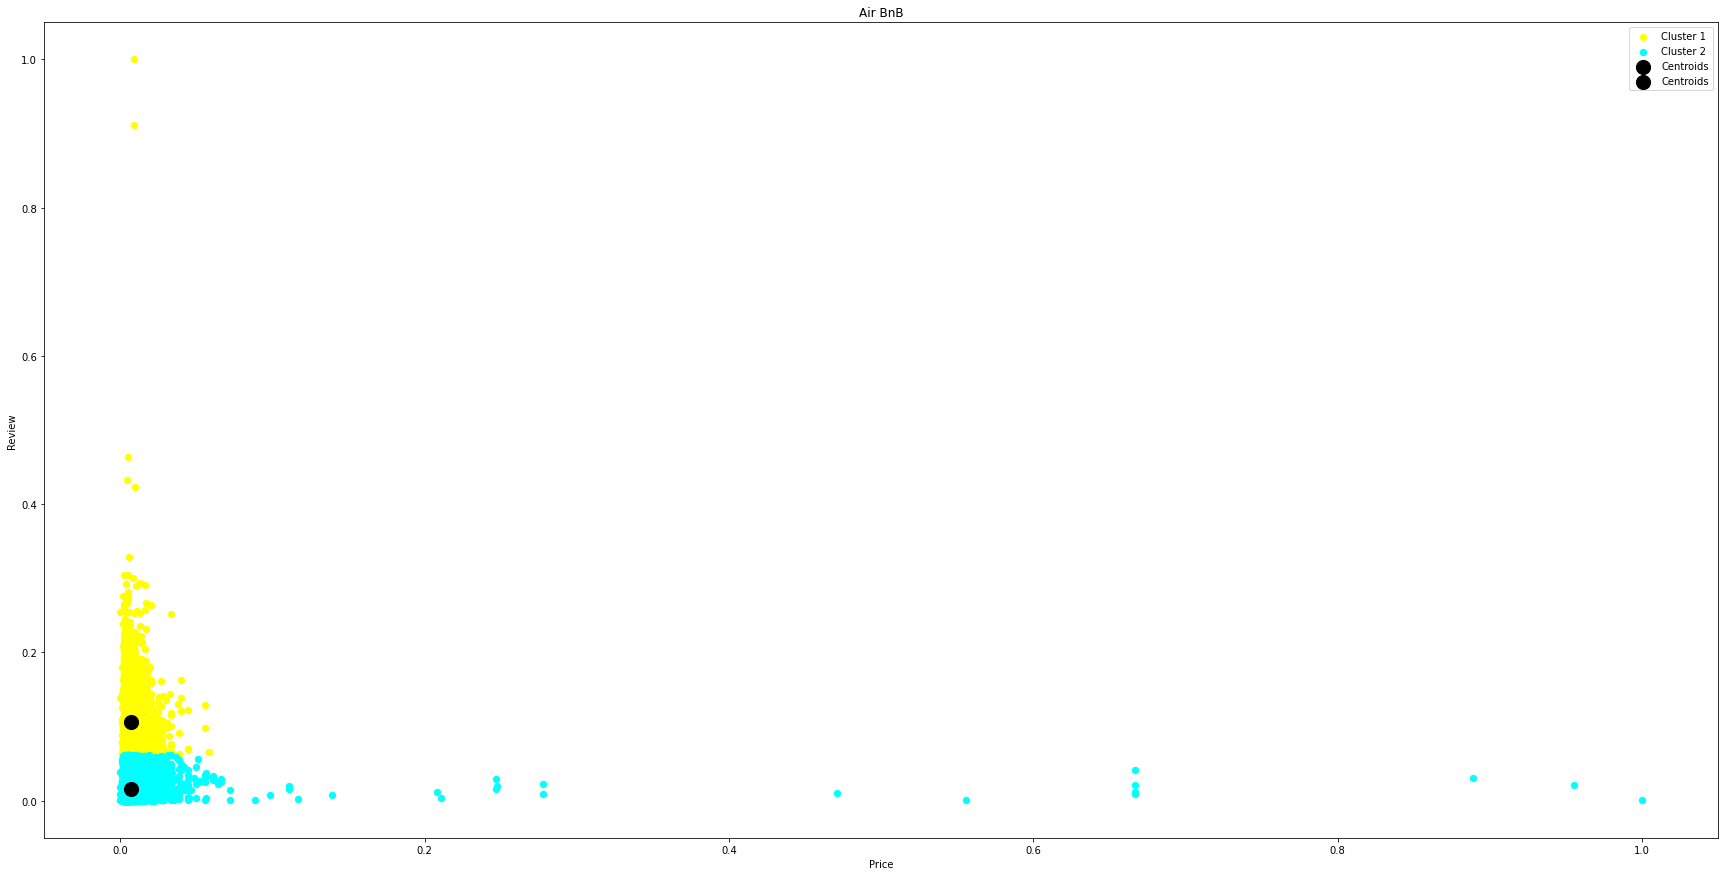

In [0]:
plt.figure(figsize=(30,15))
plt.scatter(memberC1_1[0], memberC1_1[1], s = 40, c = 'yellow', label = 'Cluster 1')
plt.scatter(memberC2_1[0], memberC2_1[1], s = 40, c = 'cyan', label = 'Cluster 2')
plt.scatter(centroidPrice1[0], centroidReview1[0], s = 200, c = 'black', label = 'Centroids')
plt.scatter(centroidPrice1[1], centroidReview1[1], s = 200, c = 'black', label = 'Centroids')
plt.title('Air BnB')
plt.xlabel('Price')
plt.ylabel('Review')
plt.legend()
plt.show()

**2. Tidak melakukan Scaling dan Deteksi Outlier**

Read Data

In [0]:
a2, b2 = readDataset()

print("Panjang Data :", len(a2), len(b2))

Panjang Data : 22552 22552


Remove Empty Data

In [0]:
tempPrice2 = []
tempReview2 = []

for i in range(len(b1)):
  if b2[i] != '' and a2[i] != '':
    tempReview2.append(float(b2[i]))
    tempPrice2.append(a2[i])

print("Panjang Data :", len(tempPrice2), len(tempReview2))

Panjang Data : 18638 18638


Grouping

In [0]:
# Melakukian Grouping setiap centroid. Maksudnya memasukan data MemberC1 atau C2 sesuai dengan jarak centroid terdekat
def groupingElbow(distanceCentroid, priceTrain, reviewTrain, jumCentroidPrice):
  memberC1 = []
  memberC2 = []
  priceC1 = []
  priceC2 = []
  reviewC1 = []
  reviewC2 = []

  for k in range(len(distanceCentroid[0])):
    temp = []
    for m in range(jumCentroidPrice):
      temp.append(distanceCentroid[m][k])
      minValue = min(temp)
      temp2 = 0
      tempIter = 0
      for n in range(len(temp)):
        if minValue == temp[n]:
          tempIter = n
      
    if tempIter == 0:
      priceC1.append(priceTrain[k])
      reviewC1.append(reviewTrain[k])
    elif tempIter == 1:
      priceC2.append(priceTrain[k])
      reviewC2.append(reviewTrain[k])
  
  memberC1.append(priceC1)
  memberC1.append(reviewC1)

  memberC2.append(priceC2)
  memberC2.append(reviewC2)


  return memberC1, memberC2

Random Centroid

In [0]:
# Random Cetroid ini digunakan untuk menentukan Cetroid
def centroidElbow(data):

  centroid = []
  jumCentroid = 2
  i = 0
  while (i < jumCentroid):
    temp = random.choice(data)
    if len(centroid) == 0:
      centroid.append(temp)
    else:
      count = 0
      while True:
        j = 0
        temp = random.choice(data)
        if temp != centroid[j]:
          break
        j = j + 1
      centroid.append(temp)
    i = i + 1

  
  return centroid, jumCentroid

Clustering

In [0]:
for j in range(30):
  if j == 0:
    centroidPrice2, jumCentroid2 = centroidElbow(tempPrice2) #define centroid
    centroidReview2, jumCentroidReview2 = centroidElbow(tempReview2) #define centroid
    distanceCentroid2 = distance(tempPrice2, tempReview2, centroidPrice2, centroidReview2, jumCentroid2) #counting distance every centroid
    memberC1_2, memberC2_2 = groupingElbow(distanceCentroid2, tempPrice2, tempReview2, jumCentroid2) #grouping data based closest distance

  else:
    centroidPrice2 = []
    centroidReview2 = []
    for k in range(jumCentroid2):
      centroidPrice2.append(statistics.mean(memberC1_2[0]))
      centroidPrice2.append(statistics.mean(memberC2_2[0]))

      centroidReview2.append(statistics.mean(memberC1_2[1]))
      centroidReview2.append(statistics.mean(memberC2_2[1]))

    distanceCentroid2 = distance(tempPrice2, tempReview2, centroidPrice2, centroidReview2, jumCentroid2)
    memberC1_2, memberC2_2 = groupingElbow(distanceCentroid2, tempPrice2, tempReview2, jumCentroid2)

print("Panjang Anggota C1 :", len(memberC1_2[0]))
print("Panjang Anggota C2 :", len(memberC2_2[0]))

Panjang Anggota C1 : 9
Panjang Anggota C2 : 18629


Plot

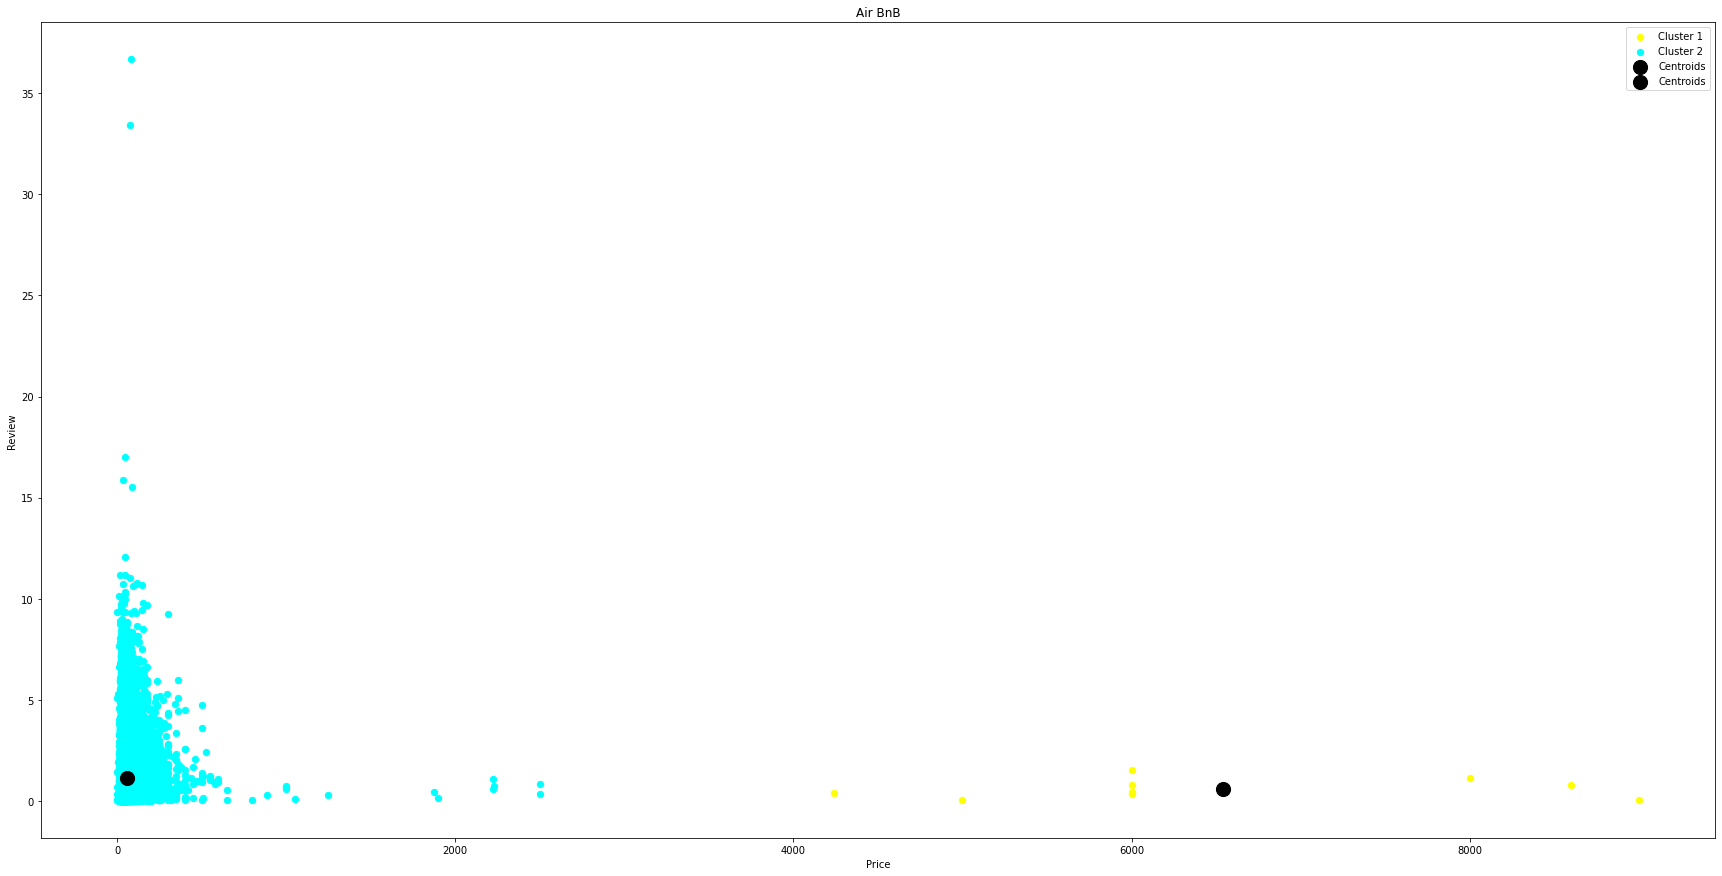

In [0]:
plt.figure(figsize=(30,15))
plt.scatter(memberC1_2[0], memberC1_2[1], s = 40, c = 'yellow', label = 'Cluster 1')
plt.scatter(memberC2_2[0], memberC2_2[1], s = 40, c = 'cyan', label = 'Cluster 2')
plt.scatter(centroidPrice2[0], centroidReview2[0], s = 200, c = 'black', label = 'Centroids')
plt.scatter(centroidPrice2[1], centroidReview2[1], s = 200, c = 'black', label = 'Centroids')
plt.title('Air BnB')
plt.xlabel('Price')
plt.ylabel('Review')
plt.legend()
plt.show()

# Kesimpulan

Dilihat dari cluster yang sudah dibuat sebelumnya. Kesimpulan yang dapat di ambil adalah :


1.   Jumlah Cluster terbaik adalah 2
2.   Harus Scaling dan juga Deteksi Outlier agar dapat mencluster dengan baik

Terima Kasih